In [1]:
%matplotlib notebook

import numpy as np
import cv2
import scipy.cluster.hierarchy
from glob import glob
from PIL import Image
from ipywidgets import interact, fixed, IntSlider
from matplotlib import pyplot as plt
from itertools import islice
from scipy.ndimage import measurements, morphology

In [2]:
def show_images(images):
    fig = plt.figure()
    for i in range(len(images)):
        img = images[i]
        a = fig.add_subplot(1, len(images), i + 1)
        plt.imshow(img, cmap=(None if len(img.shape) == 3 else 'gray'))
        #plt.axis('off')
    plt.show()

def show_rgb(img):
    show_images([img])
    
def show_hsv(images):
    show_images(cv2.cvtColor(img, cv2.COLOR_HSV2RGB) for img in images)

def show_gray(images):
    show_images(images)

<IPython.core.display.Javascript object>


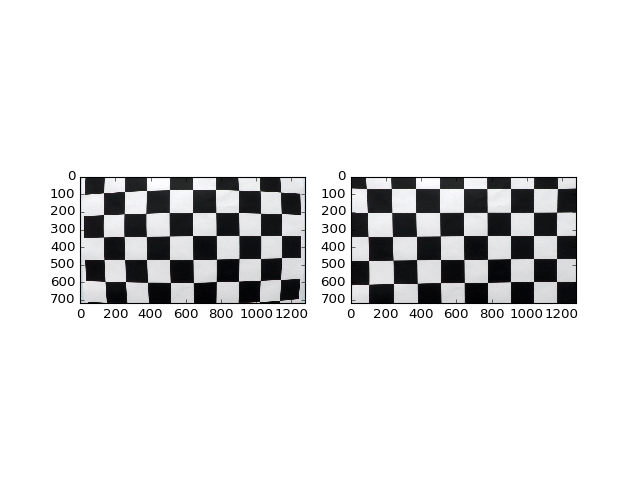

In [3]:
chess_shape = (9, 6)
objpoints = []
imgpoints = []
objp = np.zeros((6*9, 3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1, 2)
for path in glob('camera_cal/*'):
    img = cv2.imread(path) 
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, chess_shape, None)
    
    if ret:
        imgpoints.append(corners)
        objpoints.append(objp)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

def undistort(img):
    return cv2.undistort(img, mtx, dist, None, mtx)

for path in islice(glob('camera_cal/*'), 1):
    img = cv2.imread(path)
    dst = undistort(img)
    show_images([img, dst])

<IPython.core.display.Javascript object>


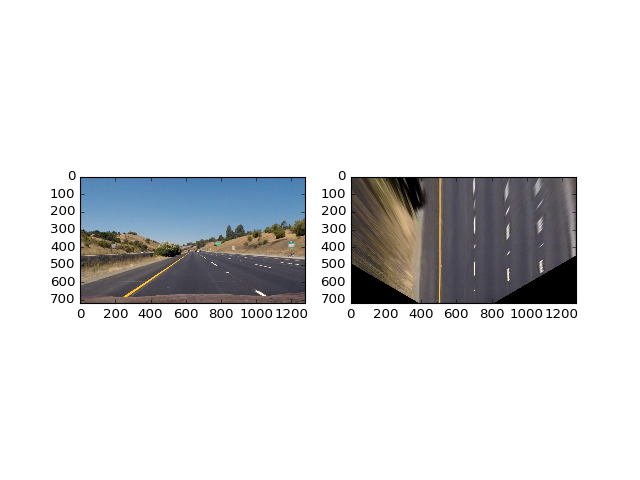

<IPython.core.display.Javascript object>


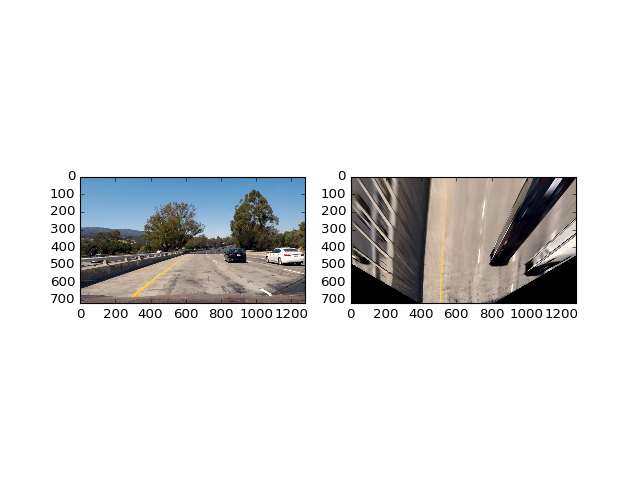

In [4]:
src = np.float32([
        [253, 685],
        [572, 465],
        [709, 465],
        [1052, 685]])

dst = np.float32([
        [500, 750],
        [500, 300],
        [700, 300],
        [700, 750]])

Mwarp = cv2.getPerspectiveTransform(src, dst)
Mrev = cv2.getPerspectiveTransform(dst, src)

def get_road(img):
    img_size = (img.shape[1], img.shape[0])
    # we mostly are interested in upscaling and CUBIC seems to be quite good
    # http://tanbakuchi.com/posts/comparison-of-openv-interpolation-algorithms/
    return cv2.warpPerspective(img, Mwarp, img_size, flags=cv2.INTER_CUBIC)
    
def unwarp(img):
    img_size = (img.shape[1], img.shape[0])
    return cv2.warpPerspective(img, Mrev, img_size)
    
for i in islice(glob('test_images3/*'), 2):
    img = np.asarray(Image.open(i))
    road = get_road(img)
    show_images([img, road])


In [ ]:
#points = np.random.random((10, 2))
pp = []
for p in [[5, 1], [4, 3], [4.5, 2.5], [4.7, 2.3], [3.9, 2]]:
    for i in range(10):
        pp.append([p[0]+np.random.random()*0.4, p[1]+np.random.random()*0.4])
        
points = np.array(pp)

x = points[:, 0]
y = points[:, 1]

residuals, rank, singular_values, rcond, pre = np.polyfit(y, x, 10, full=True)
print("residuals: %s" % residuals)
print("rank: %s" % rank)
print("singular_values: %s" % singular_values)
print("rcond: %s" % rcond)
print("pre: %s" % pre)

f = np.poly1d(residuals, variable='y')
print(f)

y_new = np.linspace(min(y), max(y), 50)
x_new = f(y_new)

plt.figure()
plt.margins(0.1, 0.1)
plt.plot(x, y, '.', x_new, y_new)
plt.show()

test_images_seq1\vlcsnap-2017-03-08-11h29m35s113.png


<IPython.core.display.Javascript object>


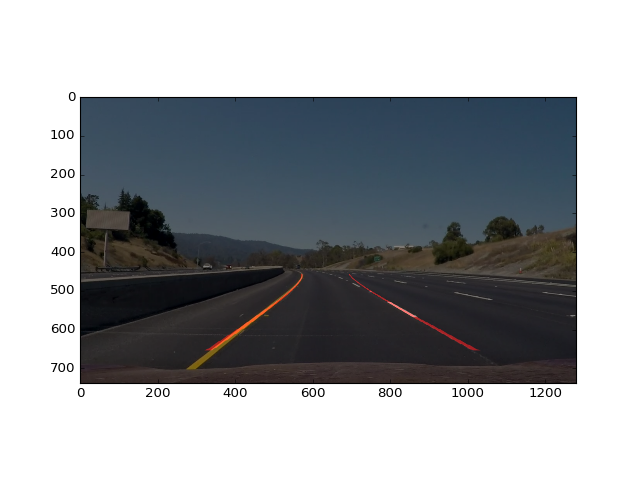

test_images_seq1\vlcsnap-2017-03-08-11h29m45s107.png


<IPython.core.display.Javascript object>


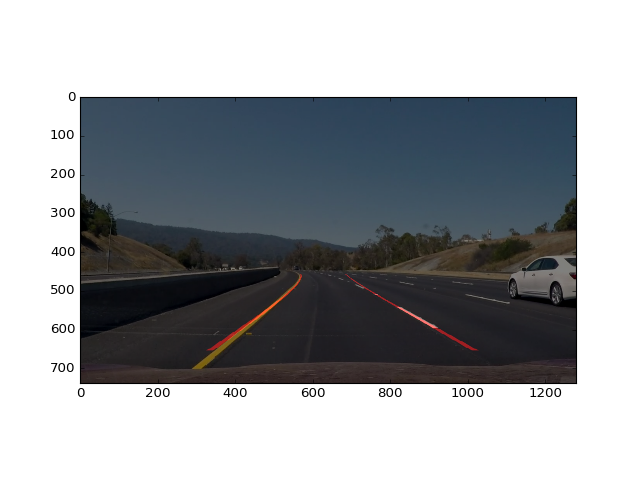

test_images_seq1\vlcsnap-2017-03-08-11h29m50s842.png


<IPython.core.display.Javascript object>


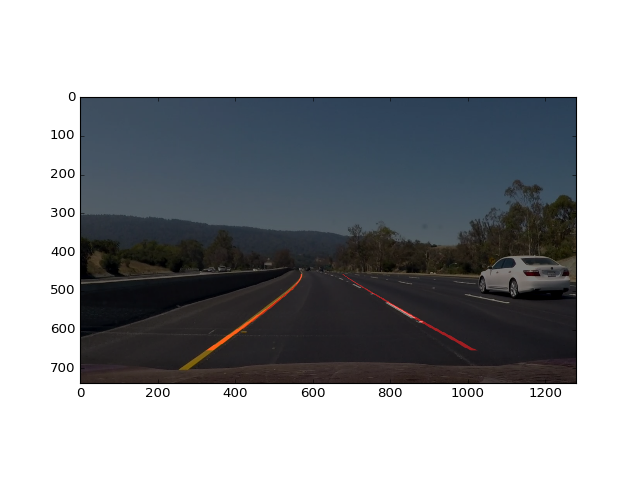

test_images_seq1\vlcsnap-2017-03-08-11h29m53s310.png


<IPython.core.display.Javascript object>


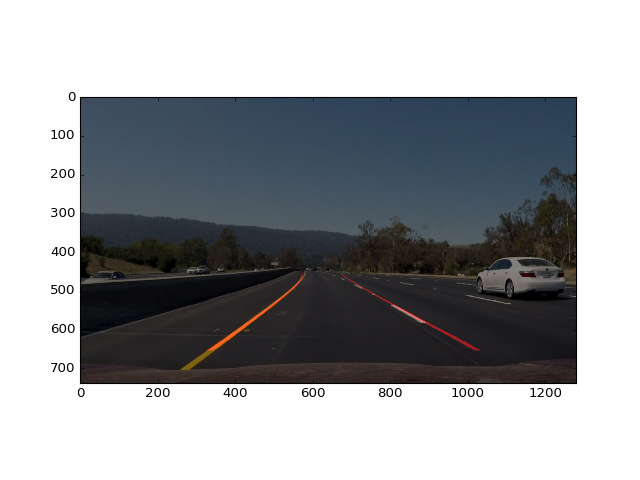

test_images_seq1\vlcsnap-2017-03-08-11h29m55s993.png


<IPython.core.display.Javascript object>


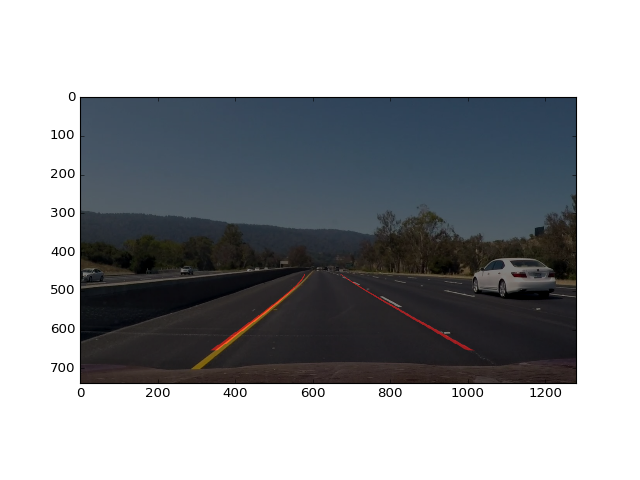

test_images_seq1\vlcsnap-2017-03-08-11h29m58s980.png


<IPython.core.display.Javascript object>


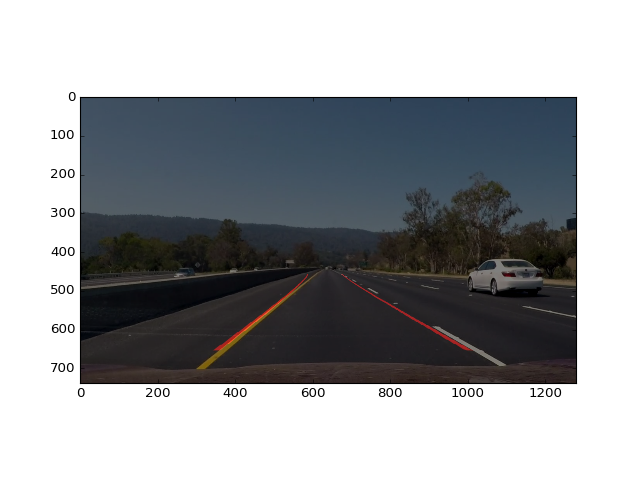

test_images_seq1\vlcsnap-2017-03-08-11h30m08s507.png


<IPython.core.display.Javascript object>


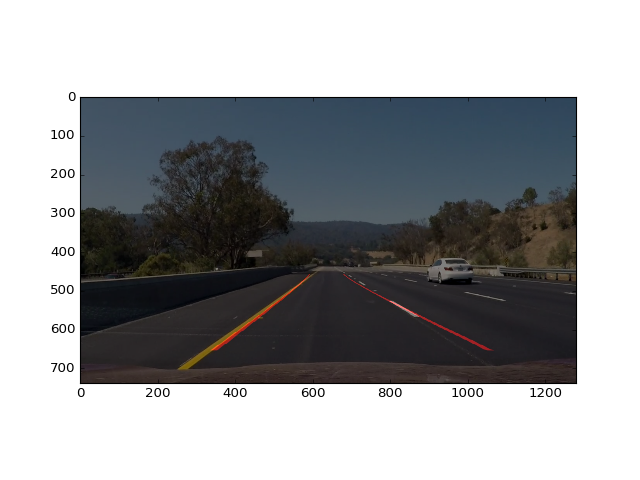

test_images_seq1\vlcsnap-2017-03-08-11h30m12s949.png


<IPython.core.display.Javascript object>


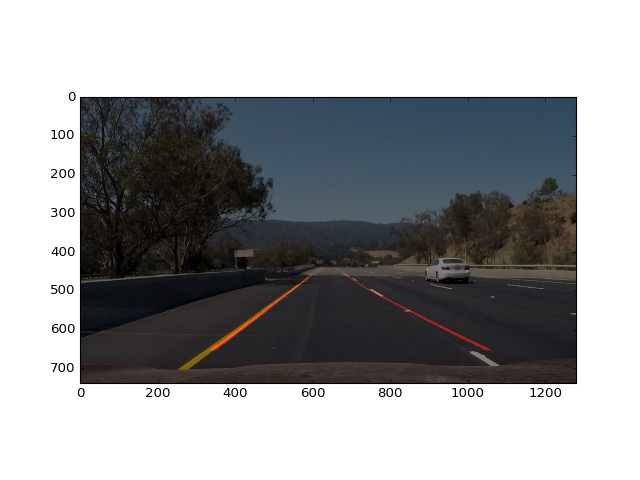

test_images_seq1\vlcsnap-2017-03-08-11h30m15s660.png


<IPython.core.display.Javascript object>


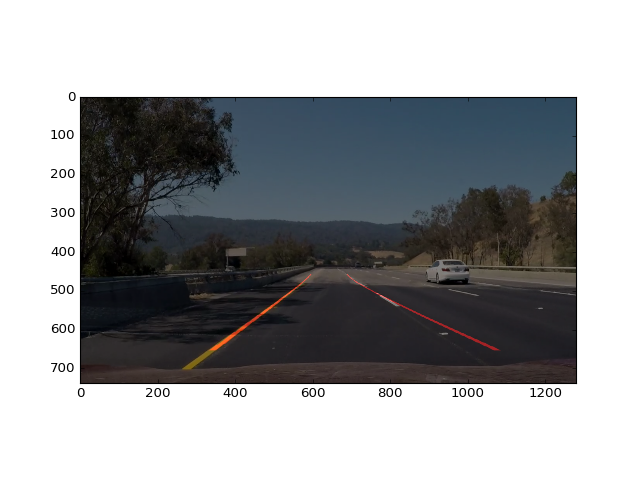

test_images_seq1\vlcsnap-2017-03-08-11h30m18s329.png


<IPython.core.display.Javascript object>


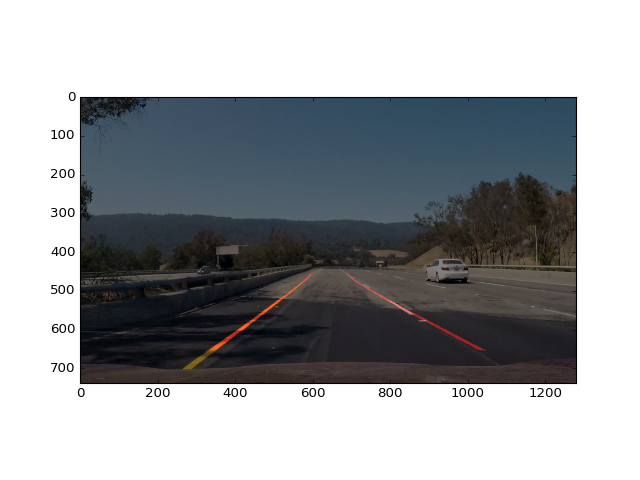

test_images_seq1\vlcsnap-2017-03-08-11h30m20s714.png


<IPython.core.display.Javascript object>


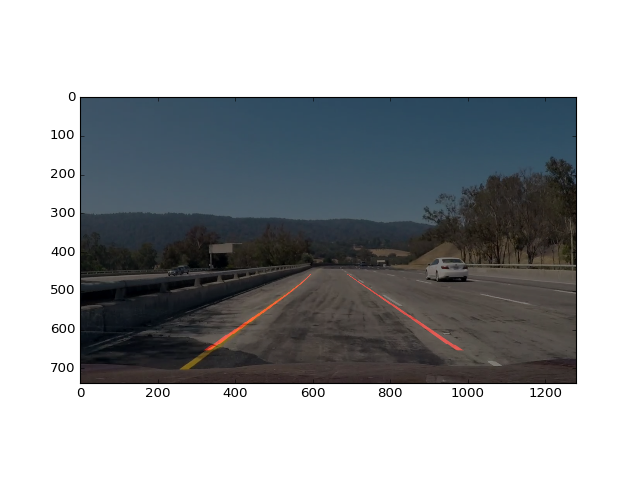

test_images_seq1\vlcsnap-2017-03-08-11h30m23s997.png


<IPython.core.display.Javascript object>


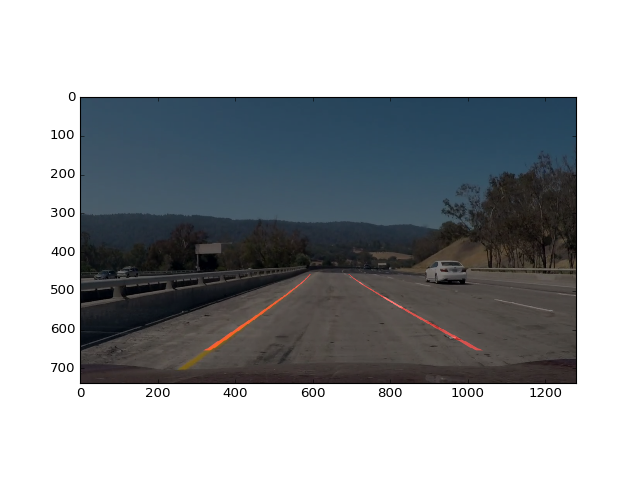

test_images_seq1\vlcsnap-2017-03-08-11h30m26s853.png


<IPython.core.display.Javascript object>


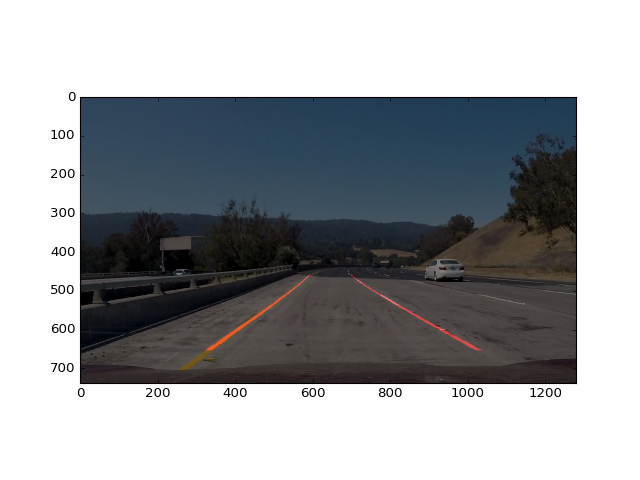

test_images_seq1\vlcsnap-2017-03-08-11h30m30s250.png


<IPython.core.display.Javascript object>


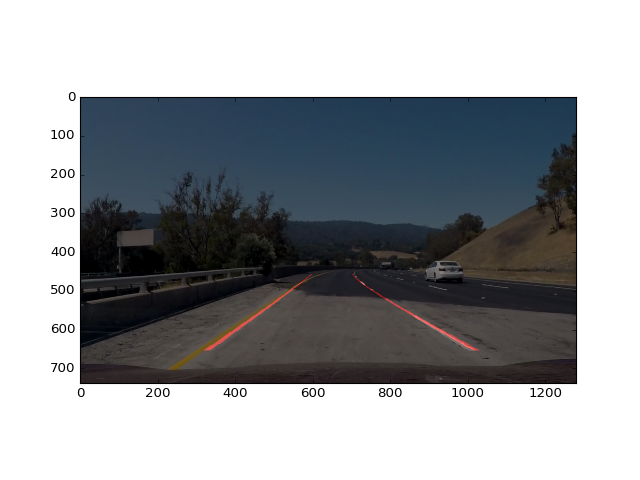

test_images_seq1\vlcsnap-2017-03-08-11h30m33s200.png


<IPython.core.display.Javascript object>


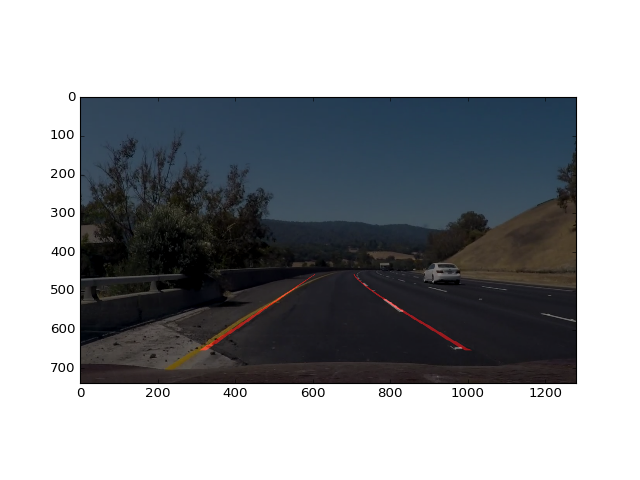

test_images_seq1\vlcsnap-2017-03-08-11h30m36s245.png


<IPython.core.display.Javascript object>


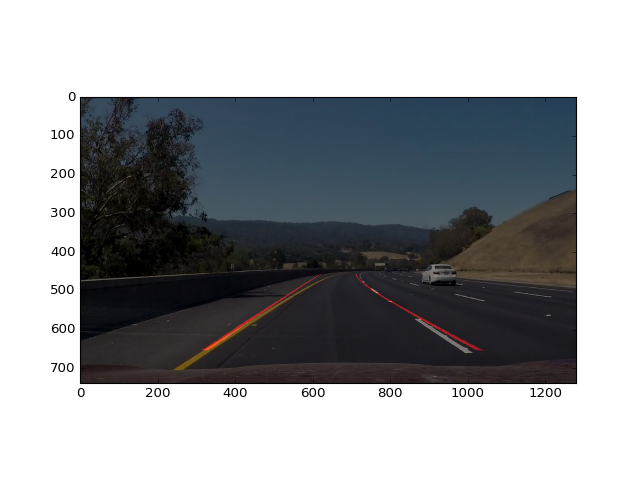

test_images_seq1\vlcsnap-2017-03-08-11h30m41s597.png


<IPython.core.display.Javascript object>


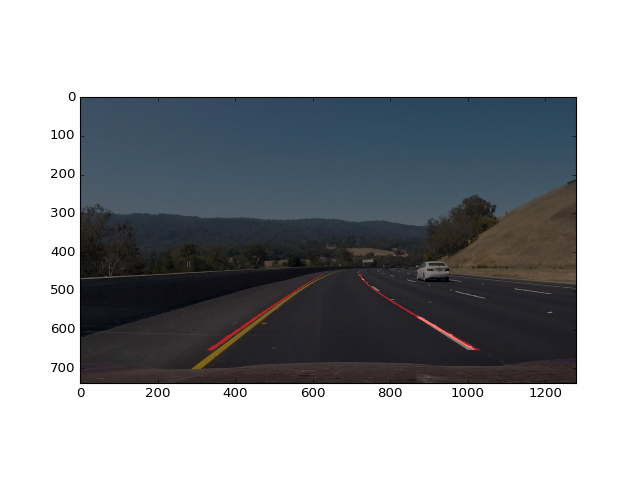

test_images_seq1\vlcsnap-2017-03-08-11h30m45s318.png


<IPython.core.display.Javascript object>

test_images_seq1\vlcsnap-2017-03-08-11h30m48s374.png


<IPython.core.display.Javascript object>


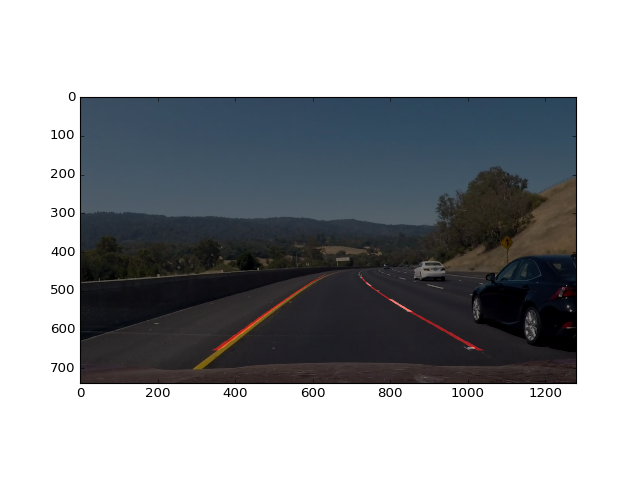

test_images_seq1\vlcsnap-2017-03-08-11h31m09s272.png


<IPython.core.display.Javascript object>


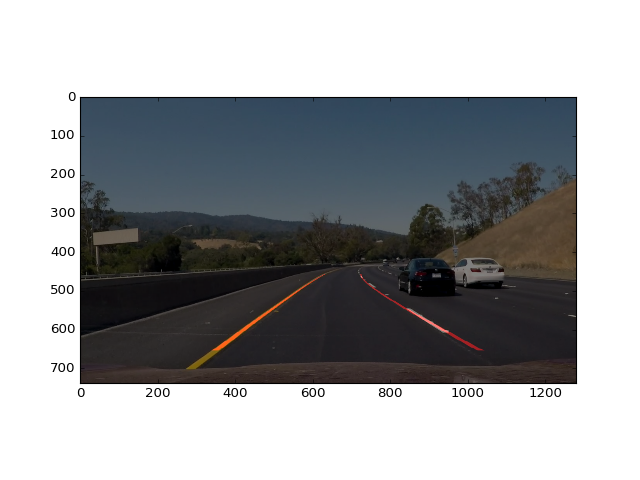

test_images_seq1\vlcsnap-2017-03-08-11h31m12s634.png


<IPython.core.display.Javascript object>


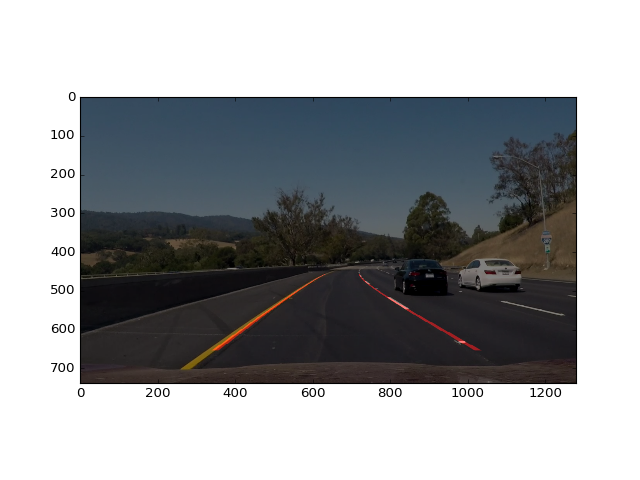

test_images_seq1\vlcsnap-2017-03-08-11h31m15s409.png


<IPython.core.display.Javascript object>


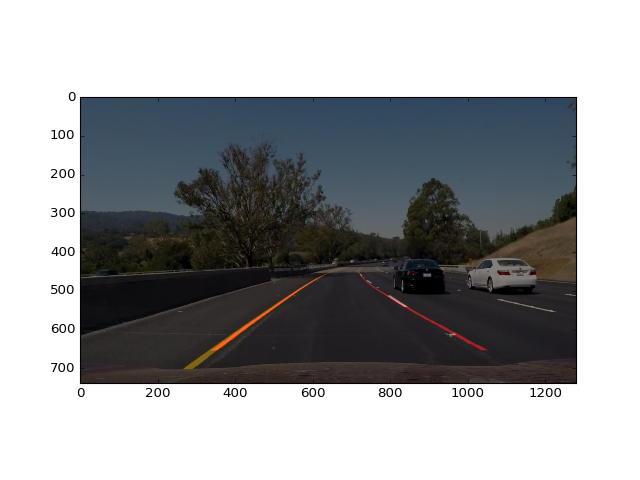

test_images_seq1\vlcsnap-2017-03-08-11h31m20s035.png


<IPython.core.display.Javascript object>


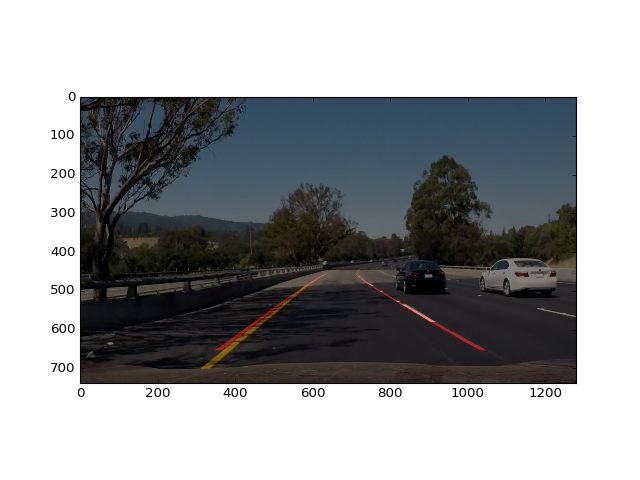

test_images_seq1\vlcsnap-2017-03-08-11h31m23s382.png


<IPython.core.display.Javascript object>


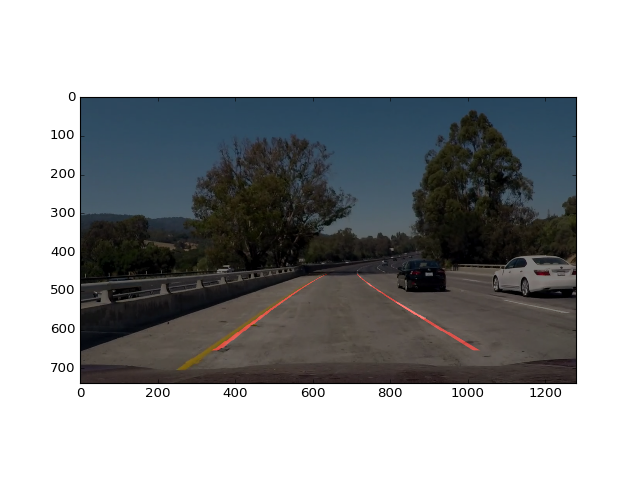

test_images_seq1\vlcsnap-2017-03-08-11h31m27s094.png


<IPython.core.display.Javascript object>


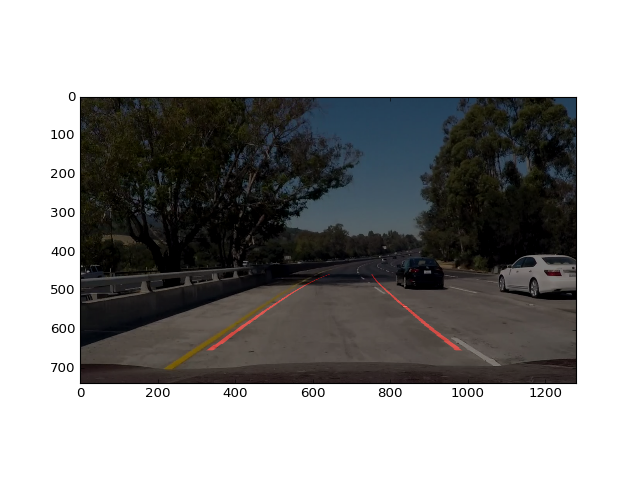

test_images_seq1\vlcsnap-2017-03-08-11h31m29s757.png


<IPython.core.display.Javascript object>


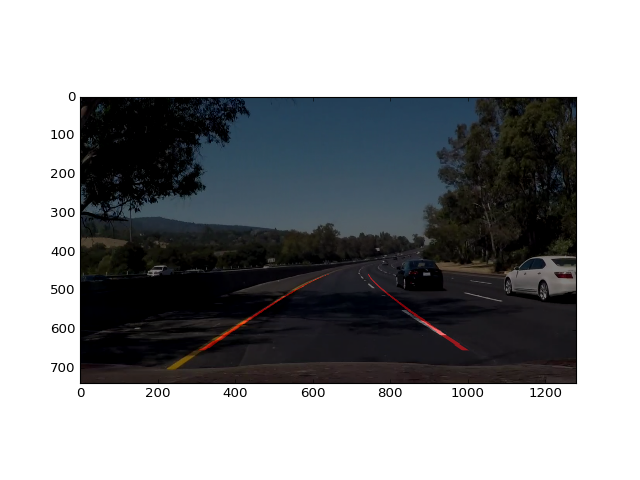

test_images_seq1\vlcsnap-2017-03-08-11h31m37s263.png


<IPython.core.display.Javascript object>


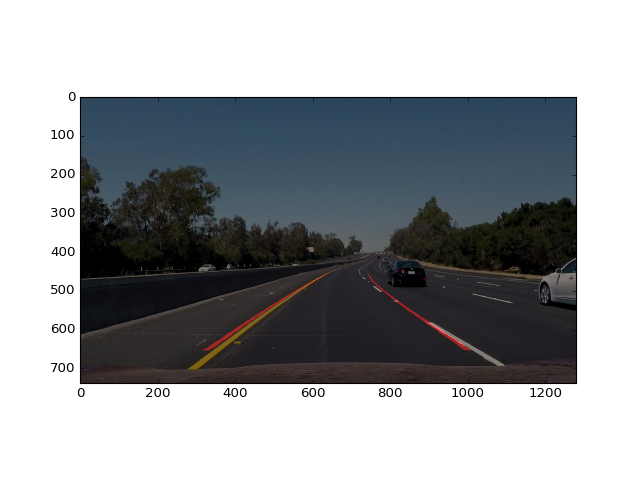

test_images_seq1\vlcsnap-2017-03-08-11h31m41s053.png


<IPython.core.display.Javascript object>


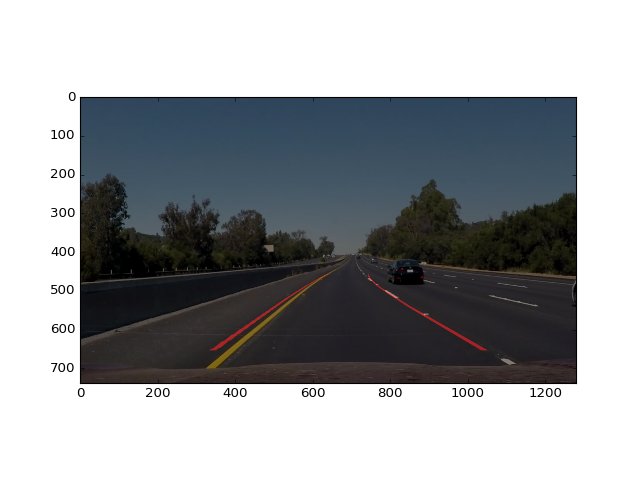

In [10]:
def find_lane_yellow_mask(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h = hsv[:,:,0]
    s = hsv[:,:,1]
    v = hsv[:,:,v]
    mask = np.zeros_like(h)
    mask[(h > 15) & (h <= 31)] = 1
    return mask
    
def find_lane_gray_mask(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    mask = np.zeros_like(gray)
    mask[gray >= 225] = 1
    return mask

def norm(v):
    return np.sqrt(v.dot(v))


def show_with_lines(gray, lines):
    fig, ax = plt.subplots()

    for line in lines:
        f = line.poly2
        ys = np.array(range(0, gray.shape[0]))
        xs = np.int64(f(ys))
        ax.plot(xs, ys)

    marked = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
    #marked[np.nonzero(labels)] = [255, 255, 255]
    ax.imshow(marked)
    plt.show()

        
class Line(object):
    def __init__(self, poly_coeffs):
        self.poly2 = np.poly1d(poly_coeffs)
        
    def __repr__(self):
        return "{}".format(self.poly2.coeffs)

        
    
def line_pair_quality(new, old):
    lc = new[0].poly2.coeffs
    rc = new[1].poly2.coeffs
    
    parallel = norm((rc - lc - np.array([0.0, 0.0, 180])) * [5000, 200, 1])
    
    bs = [np.poly1d(c)(720) for c in [lc, rc]]
    bottom_center = abs(bs[0] - 513) + abs(bs[1] - 693)
    
    return parallel + bottom_center * 2
    
    #olc = old_l
    #shifted = norm(np.abs(ol.poly2.coeffs - l.poly2.coeffs) * [0.001, 0.01, 1])
    
    #return par


def get_line(pixels):
    residuals, rank, singular_values, rcond, pre = np.polyfit(pixels[0], pixels[1], 2, full=True)
    return Line(residuals)
        

def find_best_line_pair(lines, old_lines):
    best_pair = [0, 1]
    best_pair_quality = line_pair_quality(lines[0:2], old_lines)
    
    count = len(lines)
    
    for l in range(len(lines)):
        for r in range(len(lines)):
            if l == r:
                continue
            q = line_pair_quality([lines[l], lines[r]], old_lines)
            if q < best_pair_quality:
                best_pair = [l, r]
                best_pair_quality = q
                
    return best_pair
    
    
        
def find_bright_lanes(img, old_lines):
    g_min = np.min(img)
    g_max = np.max(img)
    
    gray = (img - g_min) / (g_max - g_min)
    
    #show_images([gray])

    line_width = 8
    kernel = np.concatenate((np.repeat(-1, line_width / 2), 
                             np.repeat( 1, line_width), 
                             np.repeat(-1, line_width / 2)))

    kernel = kernel / np.sum(np.abs(kernel))
    kernel = kernel.reshape(1, -1)
    
    conv = cv2.filter2D(gray, -1, kernel)
    #show_images([conv])
    c_max = np.max(conv)
    
    min_conv = 0.05
    
    #if old_lines is not None:
    #    for l in old_lines:
    #        f = l.poly2
    #        for y in range(img.shape[0]):
    #            x = f(y)
    #            conv[y, x - line_width / 2 : x + 1 + line_width / 2] = min_conv
    
    conv[conv < min_conv] = 0
    #show_images([conv])
    
    
    def extract_lines(labels, object_count):
        #print("Number of objects: {}".format(object_count))
        
        lines = []

        for label in range(1, object_count + 1):
            pixels = np.where(labels == label)
            if len(pixels[0]) > 50:
                for p in zip(*pixels):
                    if p[0] > 300 and p[1] > 350 and p[1] < 850:
                        lines.append(get_line(pixels))
                        break
            
        return lines
    

    labels, object_count = measurements.label(conv)    

    lines = extract_lines(labels, object_count)
    #show_with_lines(np.uint8(gray * 255), lines)
    
    #for l in lines:
    #    print(l)
    
    best_pair = find_best_line_pair(lines, old_lines)
    return [lines[i] for i in best_pair]
    

def find_lanes(img, old_lines):
    #show_images([img])
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h = hsv[:, :, 0]
    s = hsv[:, :, 1]
    v = hsv[:, :, 2]
    yellow = cv2.inRange(h, 20, 23) #* np.float32(1.0 / 255.0)
    #print("yellow:")
    #show_images([yellow])
    #yellow[(h < 18) | (h > 30)] = 0
    lane_colors = np.maximum(gray, yellow)
    #lane_colors = gray
    new_lines = find_bright_lanes(lane_colors, old_lines)
    
    if old_lines is not None:
        #print("Avg with old")
        lines = [Line(o.poly2.coeffs * 0.7 + n.poly2.coeffs * 0.3) for o, n in zip(old_lines, new_lines)]
    else:
        #print("New only")
        lines = new_lines
    
    #print(lines)
    lane_direction = np.average([l.poly2.coeffs for l in lines], axis=0)
    #print(lane_direction)
    
    car_offset = np.poly1d(lane_direction)(img.shape[0]) - img.shape[1]/2
    curvature = (((1 + (2*lane_direction[0]*img.shape[0] + lane_direction[1])**2)**1.5) 
                 / np.absolute(2*lane_direction[0]))

    #show_with_lines(gray, lines)
    
    #print("car_offset: {}, curvature: {}".format(car_offset, curvature))
    
    return lines
    
    
def process_image(img, lines):
    road = get_road(img)
    lines = find_lanes(road, lines)
    markings = np.zeros_like(road)
    for l in lines:
        line_points = np.int32([(l.poly2(y), y) for y in range(200, 900, 20)])
        cv2.polylines(markings, [line_points], False, [255, 0, 0], 3)
        
    markings = unwarp(markings)
        
    img = np.uint8(img * 0.5 + markings * 0.5)
    return img, lines


lines = None
fff = glob('test_images_seq1/*')
for i in islice(fff, len(fff)):
    print(i)
    img = np.array(Image.open(i))
    #show_images([img])
    img, lines = process_image(img, lines)
    show_images([img])
    
  

In [ ]:
def test():
    lines = [Line(c) for c in [
        [ -2.82383990e-04,   3.18864517e-01,  4.27650275e+02],
        [ -1.06770783e-03,   4.33154179e-01,  7.34093445e+02],
        [  3.80097676e-04,  -1.02657154e-01,  6.35585156e+02],
        [  2.17074438e-03,  -1.83652077e+00,  1.16180932e+03],
        [ -1.69136327e-03,   1.23948238e+00,  4.30885056e+02],
        [  1.32287729e-02,  -1.06504087e+01,  2.94914156e+03],
        [ -3.10076257e-03,   2.69704321e+00,  2.26507834e+02],
        [  4.50821855e-04,  -2.98790970e-01,  7.11242035e+02],
        [  1.91154587e-04,  -8.79612952e-01,  1.22248405e+03],
        [ -6.00169380e-04,   6.52602631e-01,  2.26279793e+02],
        [ -1.36159644e-02,   1.45979370e+01, -3.22697654e+03],
        [  1.72019171e-03,  -1.75312771e+00,  1.29682681e+03],
        [ -3.01241707e-04,   4.85140331e-01,  5.06949001e+02]
    ]]

    best = find_best_line_pair(lines, None)
    if best != [0, 12]:
        print("fail, got {}".format(best))
    else:
        print("success")
        
def test2():
    lines = [Line(c) for c in [
        [  4.49682492e-04, -2.90692639e-01,  7.26908599e+02],
        [ -2.57546450e-02,  2.11077542e+01, -3.86431983e+03],
        [  4.34706522e-04, -3.44461130e-01,  7.57173728e+02],
        [ -6.39274890e-03,  5.74102519e+00, -4.42535360e+02],
        [  2.84357648e-06, -1.72789235e+00,  2.04781347e+03],
        [ -9.03770994e-03,  8.44264197e+00, -1.42709499e+03],
        [  3.62582346e-02, -3.48894959e+01,  8.89290365e+03],
        [  8.64567803e-04, -1.01309683e+00,  7.37349944e+02],
        [  4.10125169e-03, -4.20053671e+00,  1.59860914e+03],
        [ -2.80035214e-03,  2.83110736e+00, -2.84292053e+02],
        [  3.61434505e-04, -5.17461871e-01,  6.15215284e+02],
        [ -8.47950315e-04,  8.62619149e-01,  2.08541817e+02],
        [  1.07559110e-02, -1.19750597e+01,  3.85393763e+03],
        [ -1.28520029e-02,  1.50835191e+01, -3.90431267e+03],
        [  7.00373541e-04, -9.50962207e-01,  7.39840286e+02],
        [ -6.27214314e-04,  8.13116974e-01,  4.34268241e+02],
        [  2.04562000e-04, -3.63975253e-01,  5.79178412e+02],
        [ -1.10993494e-04,  9.56479120e-02,  5.00226958e+02],
        [  1.95917746e-03, -2.57458852e+00,  1.26206914e+03],
        [ -8.43069537e-04,  1.07946474e+00,  6.89314944e+01],
        [ -1.60222050e-03,  2.18597502e+00, -3.34092570e+02]
    ]]
    best = find_best_line_pair(lines, None)
    if best not in [[17, 0], [17, 2]]:
        print("fail, got {}".format(best))
    else:
        print("success")
        
test()
test2()

In [ ]:
img = np.array(Image.open('test_images_tough/vlcsnap-2017-03-08-11h30m23s997.png'))
    
@interact(img = fixed(img), lh = IntSlider(min=0, max=40, value=15, width='800px'), hh = IntSlider(min=0, max=40, value=31, width='800px'))
def show_hue(img, lh, hh):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h = hsv[:, :, 0]
    h[(h < lh) | (h > hh)] = 0
    #show_images([img])
    plt.figure()
    plt.imshow(h, cmap = 'gray')
    plt.show()
    


In [ ]:
for i in islice(glob('test_images/*'), 8):
    img = np.array(Image.open(i))
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = cv2.blur(gray, ksize=(3, 3))
    contours = cv2.findContours(gray, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)
    print(contours)
    for j in range(len(contours)):
        cv2.drawContours(img, np.array(contours), j, [255, 0, 0])

In [ ]:
@interact(x=(0, 20))
def update_image(x):
    img = np.asarray(Image.open(i))
    h, w = img.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)
    cv2.floodFill(img, mask, (345, 647), (255, 0, 0), (x, x, x), (x, x, x))
    plt.imshow(img)

In [6]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

lines2 = None
def process_image2(image):
    global lines2
    try:
        result, lines2 = process_image(image, lines2)
    except Error as ex:
        print("failed {}".format(ex))
        imshow(image)
        result = image
    
    return result

clip1 = VideoFileClip("project_video.mp4")
clip = clip1.fl_image(process_image2)
%time clip.write_videofile('project_video_output.mp4', audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████████████████████████████████▉| 1260/1261 [30:56<00:01,  1.55s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

Wall time: 30min 59s


In [8]:
def process_video(file_name):
    lines2 = None
    def process_frame(image):
        global lines2
        try:
            result, lines2 = process_image(image, lines2)
        except Error as ex:
            print("failed {}".format(ex))
            imshow(image)
            result = image

        return result

    clip = VideoFileClip(file_name)
    processed_clip = clip.fl_image(process_frame)
    %time processed_clip.write_videofile(file_name.replace('.', '-output.'), audio=False)
    
process_video("vlc-record-2017-03-09-00h07m30s-harder_challenge_video.mp4")

[MoviePy] >>>> Building video vlc-record-2017-03-09-00h07m30s-harder_challenge_video-output.mp4
[MoviePy] Writing video vlc-record-2017-03-09-00h07m30s-harder_challenge_video-output.mp4


100%|████████████████████████████████████████| 201/201 [19:14<00:00,  7.29s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: vlc-record-2017-03-09-00h07m30s-harder_challenge_video-output.mp4 

Wall time: 19min 15s
